# Importation

### Questions:

In [1]:
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore")
import sys
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm

import nltk 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
from pdfminer.high_level import extract_text

# pdf into txt 

In [3]:
output_file11 = "E_TEXTPMBOK.txt"
output_file22 = "E_TEXTPMI.txt"
output_file1 = "TEXTPMBOK.txt"
output_file2 = "TEXTPMI.txt"

In [4]:
with open(output_file11, "r", encoding="utf-8") as file:
    E_TEXTPMBOK = file.read()
with open(output_file22, "r", encoding="utf-8") as file:
    E_TEXTPMI = file.read()
    

with open(output_file1, "r", encoding="utf-8") as file:
    TEXTPMBOK = file.read()
with open(output_file2, "r", encoding="utf-8") as file:
    TEXTPMI = file.read()

In [31]:
print(TEXTPMBOK)

A Guide to the 
PROJECT MANAGEMENT 
BODY OF KNOWLEDGE

N ot F or Distribution, S ale or R eproduction.

(PMBOK® GUIDE )
Sixth Edition

Library of Congress Cataloging-in-Publication Data

Published by:

ISBN: 978-1-62825-184-5 

Project Management Institute, Inc.
14 Campus Boulevard
Newtown Square, Pennsylvania 19073-3299 USA
Phone: +1 610-356-4600
Fax: +1 610-356-4647
Email: customercare@pmi.org
Website: www.PMI.org

Names: Project Management Institute, publisher.
Title: A guide to the project management body of knowledge (PMBOK guide) / Project Management Institute.
Other titles: PMBOK guide
Description: Sixth edition. | Newtown Square, PA: Project Management Institute, 2017. | Series: PMBOK guide | Includes 
bibliographical references and index. 
Identiﬁers: LCCN 2017032505 (print) | LCCN 2017035597 (ebook) | ISBN 9781628253900 (ePUP) | 
ISBN 9781628253917 (kindle) | ISBN 9781628253924 ( Web PDF) | ISBN 9781628251845 (paperback)
Subjects: LCSH: Project management. | BISAC: BUSINESS 

# Cleaning Data:

In [5]:
def clean_text(text):
    # Remove special characters and symbols (retain letters, numbers, and basic punctuation)
    cleaned_text = re.sub(r'[^a-zA-Z0-9.,!? ]', '', text)
    
    # Remove extra spaces and trim leading/trailing spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

In [6]:
E_TEXTPMBOK=clean_text(E_TEXTPMBOK).lower()
E_TEXTPMI=clean_text(E_TEXTPMI).lower()

In [8]:
E_TEXTPMBOK

'10the project communications management processes arestorage, retrieval, management, monitoring, and the ultimate disposition of project information.pr oje ct communi ca ti ons management10.2 manage communicationsthe process of ensuring timely and appropriate collection, creation, distribution, 10.1 plan communications managementthe process of developing an appropriate approach and plan for project communication activities based on the information needs of each stakeholder or group, available organizational assets, and the needs of the project.project communications management includes the processes necessary to ensure that the information needs of the project and its stakeholders are met through development of artifacts and implementation of activities designed to achieve effective information exchange. project communications management consists of two parts. the rst part is developing a strategy to ensure communication is effective for stakeholders. the second part is carrying out t

In [30]:
print(E_TEXTPMBOK)

10the project communications management processes arestorage, retrieval, management, monitoring, and the ultimate disposition of project information.pr oje ct communi ca ti ons management10.2 manage communicationsthe process of ensuring timely and appropriate collection, creation, distribution, 10.1 plan communications managementthe process of developing an appropriate approach and plan for project communication activities based on the information needs of each stakeholder or group, available organizational assets, and the needs of the project.project communications management includes the processes necessary to ensure that the information needs of the project and its stakeholders are met through development of artifacts and implementation of activities designed to achieve effective information exchange. project communications management consists of two parts. the rst part is developing a strategy to ensure communication is effective for stakeholders. the second part is carrying out th

#  Tokenization and Normalization:

In [7]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_and_normalize(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Normalize by converting tokens to lowercase
    normalized_tokens = [token.lower() for token in tokens]
    
    return normalized_tokens



In [8]:
words_E_TEXTPMBOK=tokenize_and_normalize(E_TEXTPMBOK)
words_E_TEXTPMI=tokenize_and_normalize(E_TEXTPMI)

#  POS-TAGGING

In [9]:
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
def pos_tagging(words):
    
    # Perform POS tagging
    pos_tags = pos_tag(words)
    
    return pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hamma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
posTEXTPMBOK=pos_tagging(words_E_TEXTPMBOK)
posTEXTPMI=pos_tagging(words_E_TEXTPMI)

In [13]:
posTEXTPMBOK

[('10the', 'CD'),
 ('project', 'NN'),
 ('communications', 'NNS'),
 ('management', 'NN'),
 ('processes', 'VBZ'),
 ('arestorage', 'NN'),
 (',', ','),
 ('retrieval', 'NN'),
 (',', ','),
 ('management', 'NN'),
 (',', ','),
 ('monitoring', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('disposition', 'NN'),
 ('of', 'IN'),
 ('project', 'NN'),
 ('information.pr', 'NN'),
 ('oje', 'IN'),
 ('ct', 'NN'),
 ('communi', 'NN'),
 ('ca', 'MD'),
 ('ti', 'VB'),
 ('ons', 'NNS'),
 ('management10.2', 'JJ'),
 ('manage', 'NN'),
 ('communicationsthe', 'NN'),
 ('process', 'NN'),
 ('of', 'IN'),
 ('ensuring', 'VBG'),
 ('timely', 'JJ'),
 ('and', 'CC'),
 ('appropriate', 'JJ'),
 ('collection', 'NN'),
 (',', ','),
 ('creation', 'NN'),
 (',', ','),
 ('distribution', 'NN'),
 (',', ','),
 ('10.1', 'CD'),
 ('plan', 'NN'),
 ('communications', 'NNS'),
 ('managementthe', 'VBP'),
 ('process', 'NN'),
 ('of', 'IN'),
 ('developing', 'VBG'),
 ('an', 'DT'),
 ('appropriate', 'JJ'),
 ('approach', 'NN'),


#  STOPWORDS

In [11]:
def remove_stopwords_from_list(word_list,pos_tags):
    
    # Define a list of POS tags for words to keep (e.g., nouns and adjectives)
    allowed_pos_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS']  # Nouns and adjectives
    
    # Filter out stopwords based on POS tags
    filtered_words = [word for word, pos_tag in zip(word_list, pos_tags) if pos_tag[1]
                      in allowed_pos_tags]
    
    return filtered_words

In [12]:
posed_TEXTPMBOK=remove_stopwords_from_list(words_E_TEXTPMBOK,posTEXTPMBOK)
posed_TEXTPMI=remove_stopwords_from_list(words_E_TEXTPMI,posTEXTPMI)

In [16]:
posed_TEXTPMBOK

['project',
 'communications',
 'management',
 'arestorage',
 'retrieval',
 'management',
 'monitoring',
 'ultimate',
 'disposition',
 'project',
 'information.pr',
 'ct',
 'communi',
 'ons',
 'management10.2',
 'manage',
 'communicationsthe',
 'process',
 'timely',
 'appropriate',
 'collection',
 'creation',
 'distribution',
 'plan',
 'communications',
 'process',
 'appropriate',
 'approach',
 'plan',
 'project',
 'communication',
 'activities',
 'information',
 'needs',
 'stakeholder',
 'group',
 'available',
 'organizational',
 'assets',
 'needs',
 'project.project',
 'communications',
 'management',
 'processes',
 'necessary',
 'information',
 'needs',
 'project',
 'stakeholders',
 'development',
 'artifacts',
 'implementation',
 'activities',
 'effective',
 'information',
 'exchange',
 'project',
 'communications',
 'management',
 'parts',
 'rst',
 'part',
 'strategy',
 'communication',
 'effective',
 'stakeholders',
 'second',
 'part',
 'activities',
 'necessary',
 'communication

#  Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word_list(word_list):
    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each word in the list
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_list]
    
    return lemmatized_words

In [14]:
lemmatized_TEXTPMBOK=lemmatize_word_list(posed_TEXTPMBOK)
lemmatized_TEXTPMI=lemmatize_word_list(posed_TEXTPMI)

In [19]:
lemmatized_TEXTPMBOK

['project',
 'communication',
 'management',
 'arestorage',
 'retrieval',
 'management',
 'monitoring',
 'ultimate',
 'disposition',
 'project',
 'information.pr',
 'ct',
 'communi',
 'ons',
 'management10.2',
 'manage',
 'communicationsthe',
 'process',
 'timely',
 'appropriate',
 'collection',
 'creation',
 'distribution',
 'plan',
 'communication',
 'process',
 'appropriate',
 'approach',
 'plan',
 'project',
 'communication',
 'activity',
 'information',
 'need',
 'stakeholder',
 'group',
 'available',
 'organizational',
 'asset',
 'need',
 'project.project',
 'communication',
 'management',
 'process',
 'necessary',
 'information',
 'need',
 'project',
 'stakeholder',
 'development',
 'artifact',
 'implementation',
 'activity',
 'effective',
 'information',
 'exchange',
 'project',
 'communication',
 'management',
 'part',
 'rst',
 'part',
 'strategy',
 'communication',
 'effective',
 'stakeholder',
 'second',
 'part',
 'activity',
 'necessary',
 'communication',
 'strategy.n',
 '

#  Chunking

<span style='color: blue;'>While lemmatization and POS tagging involve analyzing individual words and their grammatical properties, chunking involves identifying and grouping words into larger phrases or chunks based on specific linguistic patterns.</span>

The extracted chunks can be used as building blocks for constructing a conceptual ontology that represents the relationships and hierarchy of PRM concepts. Each chunk can correspond to a node in the graph, and the grammar rules can help define the edges and connections between nodes.

In [20]:
from nltk import word_tokenize, pos_tag, RegexpParser
# Define a chunking grammar using regular expressions
grammar = r"""
    NP: {<DT>?<JJ>*<NN>}  # Chunk sequences of determiner, adjective, noun
    VP: {<VB.*><NP|PP|CLAUSE>+$}  # Chunk verbs and their complements
    PP: {<IN><NP>}  # Chunk prepositions and their objects
    CLAUSE: {<NP><VP>}  # Chunk noun phrases and verb phrases
"""
# Create a chunk parser using the defined grammar
chunk_parser = RegexpParser(grammar)
    
# Perform chunking
chunks = chunk_parser.parse(posTEXTPMBOK[1:20])
    
chunks.pretty_print()

                                                                                    S                                                                                                                      
        ____________________________________________________________________________|______________________________________________________________________________________________________________         
       |              |        |   |   |   |    |        |            |             |            |             |             |                   |                            PP                   |       
       |              |        |   |   |   |    |        |            |             |            |             |             |                   |                        ____|______              |        
       |              |        |   |   |   |    |        NP           NP            NP           NP            NP            NP                  NP                      |           N

# Noun Phrase and Verb Phrase Chunking 
# (output: 2 lists; concepts & relationships)

# >10

In [15]:
import nltk
from nltk import word_tokenize, pos_tag, RegexpParser
from collections import Counter  # Import the Counter class

tokens = word_tokenize(E_TEXTPMBOK)
pos_tags = pos_tag(tokens)

# Define a chunking grammar for noun phrases (NP) and verb phrases (VP)
grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
    VP: {<VB.*>+<NP>?}      # Chunk verb phrases with optional NP
"""
chunk_parser = RegexpParser(grammar)

# Perform chunking to identify NP and VP
chunked_text = chunk_parser.parse(pos_tags)

# Extract and print identified concepts and relationships
concepts = []
relationships = []

for subtree in chunked_text.subtrees():
    if subtree.label() == 'NP':
        concepts.append(" ".join(word for word, pos in subtree.leaves()))
    elif subtree.label() == 'VP':
        relationships.append(" ".join(word for word, pos in subtree.leaves()))
        
# Concept frequencies
concept_freq = Counter(concepts)
frequency_threshold = 10  # Concepts that occur at least 10 times
pertinent_concepts = [concept for concept in concepts if concept_freq[concept] >= frequency_threshold]

print(f"Total Concepts: {len(concepts)}")
print(f"Total Pertinent Concepts: {len(pertinent_concepts)}")
print(f"Total Relationships: {len(relationships)}")
print("================================================================")
print("Concepts:", concepts)
print("Relationships:", relationships)

with open("Concepts&Relationships.txt", "w") as output_file:
    output_file.write("Concepts:\n")
    for concept in concepts:
        output_file.write(f"{concept}\n")
    
    output_file.write("\nRelationships:\n")
    for relationship in relationships:
        output_file.write(f"{relationship}\n")


Total Concepts: 4217
Total Pertinent Concepts: 924
Total Relationships: 2030
Concepts: ['project communications management', 'arestorage', 'retrieval', 'management', 'monitoring', 'the ultimate disposition', 'project information.pr', 'ct communi', 'ons', 'management10.2 manage communicationsthe process', 'appropriate collection', 'creation', 'distribution', 'plan communications', 'process', 'an appropriate approach', 'plan', 'project communication activities', 'the information needs', 'each stakeholder', 'group', 'available organizational assets', 'the needs', 'the project.project communications management', 'the processes', 'the information needs', 'the project', 'stakeholders', 'development', 'artifacts', 'implementation', 'activities', 'effective information exchange', 'project communications management', 'parts', 'the rst part', 'a strategy', 'communication', 'stakeholders', 'the second part', 'the activities', 'the communication strategy.n', 'ot f', 'distribution', 's ale', 'r epr

In [16]:
def add_iob_tags(data):
    iob_data = []
    for word, pos in data:
        # Define your chunking criteria here
        if pos in ['NN', 'NNS', 'NNP', 'NNPS']:
            iob_data.append((word, pos, 'B-NP'))  # Beginning of a noun phrase
        else:
            iob_data.append((word, pos, 'O'))     # Outside of any chunk
    return iob_data

# Modify the data with IOB tags
iob_data = add_iob_tags(posTEXTPMBOK)

# Print the modified data
for word, pos, iob_tag in iob_data:
    print(f"Word: {word}, POS: {pos}, IOB Tag: {iob_tag}")

Word: 10the, POS: CD, IOB Tag: O
Word: project, POS: NN, IOB Tag: B-NP
Word: communications, POS: NNS, IOB Tag: B-NP
Word: management, POS: NN, IOB Tag: B-NP
Word: processes, POS: VBZ, IOB Tag: O
Word: arestorage, POS: NN, IOB Tag: B-NP
Word: ,, POS: ,, IOB Tag: O
Word: retrieval, POS: NN, IOB Tag: B-NP
Word: ,, POS: ,, IOB Tag: O
Word: management, POS: NN, IOB Tag: B-NP
Word: ,, POS: ,, IOB Tag: O
Word: monitoring, POS: NN, IOB Tag: B-NP
Word: ,, POS: ,, IOB Tag: O
Word: and, POS: CC, IOB Tag: O
Word: the, POS: DT, IOB Tag: O
Word: ultimate, POS: JJ, IOB Tag: O
Word: disposition, POS: NN, IOB Tag: B-NP
Word: of, POS: IN, IOB Tag: O
Word: project, POS: NN, IOB Tag: B-NP
Word: information.pr, POS: NN, IOB Tag: B-NP
Word: oje, POS: IN, IOB Tag: O
Word: ct, POS: NN, IOB Tag: B-NP
Word: communi, POS: NN, IOB Tag: B-NP
Word: ca, POS: MD, IOB Tag: O
Word: ti, POS: VB, IOB Tag: O
Word: ons, POS: NNS, IOB Tag: B-NP
Word: management10.2, POS: JJ, IOB Tag: O
Word: manage, POS: NN, IOB Tag: B-NP


Word: undertakings, POS: NNS, IOB Tag: B-NP
Word: with, POS: IN, IOB Tag: O
Word: varying, POS: VBG, IOB Tag: O
Word: degrees, POS: NNS, IOB Tag: B-NP
Word: of, POS: IN, IOB Tag: O
Word: complexity, POS: NN, IOB Tag: B-NP
Word: that, POS: WDT, IOB Tag: O
Word: aim, POS: VBZ, IOB Tag: O
Word: to, POS: TO, IOB Tag: O
Word: deliver, POS: VB, IOB Tag: O
Word: benets, POS: NNS, IOB Tag: B-NP
Word: ., POS: ., IOB Tag: O
Word: they, POS: PRP, IOB Tag: O
Word: do, POS: VBP, IOB Tag: O
Word: this, POS: DT, IOB Tag: O
Word: in, POS: IN, IOB Tag: O
Word: a, POS: DT, IOB Tag: O
Word: context, POS: NN, IOB Tag: B-NP
Word: of, POS: IN, IOB Tag: O
Word: constraints, POS: NNS, IOB Tag: B-NP
Word: and, POS: CC, IOB Tag: O
Word: assumptions, POS: NNS, IOB Tag: B-NP
Word: ,, POS: ,, IOB Tag: O
Word: while, POS: IN, IOB Tag: O
Word: responding, POS: VBG, IOB Tag: O
Word: to, POS: TO, IOB Tag: O
Word: stakeholder, POS: VB, IOB Tag: O
Word: expectations, POS: NNS, IOB Tag: B-NP
Word: that, POS: WDT, IOB Tag

In [24]:
iob_data

[('10the', 'CD', 'O'),
 ('project', 'NN', 'B-NP'),
 ('communications', 'NNS', 'B-NP'),
 ('management', 'NN', 'B-NP'),
 ('processes', 'VBZ', 'O'),
 ('arestorage', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('retrieval', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('management', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('monitoring', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('and', 'CC', 'O'),
 ('the', 'DT', 'O'),
 ('ultimate', 'JJ', 'O'),
 ('disposition', 'NN', 'B-NP'),
 ('of', 'IN', 'O'),
 ('project', 'NN', 'B-NP'),
 ('information.pr', 'NN', 'B-NP'),
 ('oje', 'IN', 'O'),
 ('ct', 'NN', 'B-NP'),
 ('communi', 'NN', 'B-NP'),
 ('ca', 'MD', 'O'),
 ('ti', 'VB', 'O'),
 ('ons', 'NNS', 'B-NP'),
 ('management10.2', 'JJ', 'O'),
 ('manage', 'NN', 'B-NP'),
 ('communicationsthe', 'NN', 'B-NP'),
 ('process', 'NN', 'B-NP'),
 ('of', 'IN', 'O'),
 ('ensuring', 'VBG', 'O'),
 ('timely', 'JJ', 'O'),
 ('and', 'CC', 'O'),
 ('appropriate', 'JJ', 'O'),
 ('collection', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('creation', 'NN', 'B-NP'),
 (',', ',', 'O'

In [29]:
import nltk
from nltk import word_tokenize, pos_tag, RegexpParser
from nltk.chunk import ChunkScore
from nltk.chunk.util import conlltags2tree, tree2conlltags
from collections import Counter

# Define your chunking grammar for noun phrases (NP) and verb phrases (VP)
grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
    VP: {<VB.*>+<NP>?}      # Chunk verb phrases with optional NP
"""
chunk_parser = RegexpParser(grammar)

# Initialize ChunkScore to keep track of evaluation metrics
chunk_score = ChunkScore()

# Iterate over the labeled data and evaluate your chunking model

sentence=[item[0] for item in iob_data]
pos=[item[1] for item in iob_data]
iob_tag=[item[2] for item in iob_data]
# Tokenize and POS tag the sentence
tokens = sentence
pos_tags = pos_tag(tokens)

# Perform chunking using your model
chunked_text = chunk_parser.parse(pos_tags)

# Convert the chunked tree to IOB format
iob_tags = tree2conlltags(chunked_text)

# Convert the labeled tree to IOB format
labeled_iob_tags = tree2conlltags(conlltags2tree([(word, label, chunk) for word, label, chunk in iob_tags]))

# Update ChunkScore with the results
chunk_score.score(labeled_iob_tags, iob_tags)

# Calculate and print evaluation metrics
print("Accuracy:", chunk_score.accuracy())
print("Precision:", chunk_score.precision())
print("Recall:", chunk_score.recall())
print("F1 Score:", chunk_score.f_measure())


ValueError: Tree is too deeply nested to be printed in CoNLL format

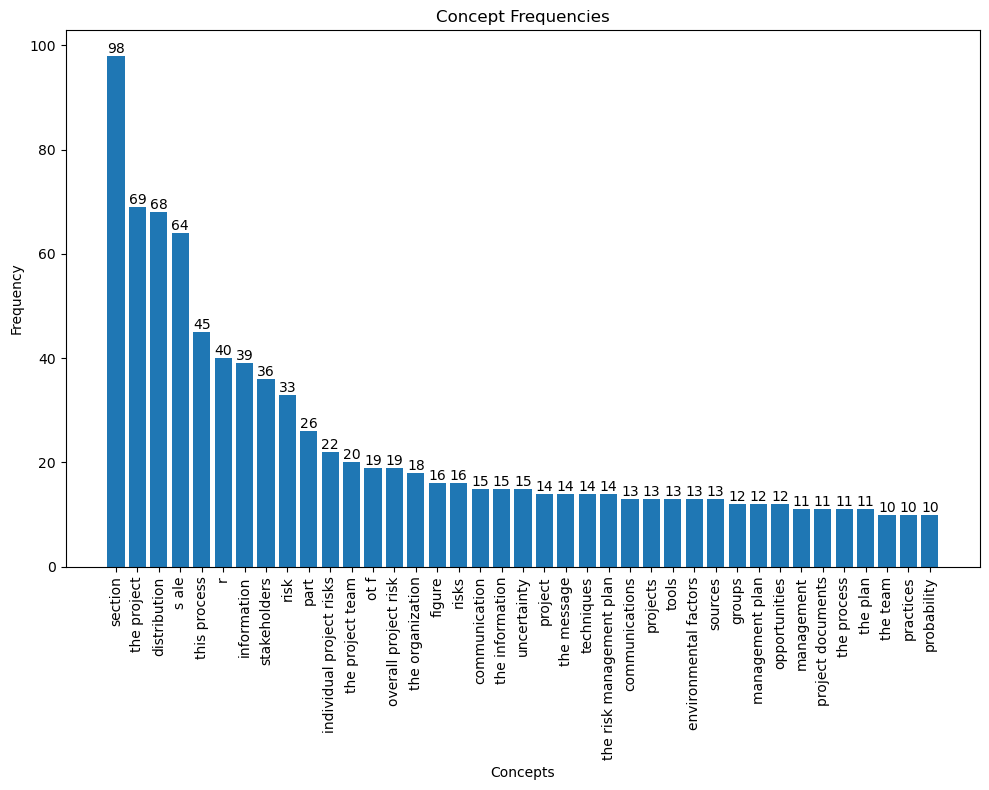

In [60]:
import matplotlib.pyplot as plt
from collections import Counter


concept_freq = Counter(pertinent_concepts)
sorted_concept_freq = dict(sorted(concept_freq.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 8))
bars = plt.bar(sorted_concept_freq.keys(), sorted_concept_freq.values())
for bar, freq in zip(bars, sorted_concept_freq.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, freq, str(freq), ha='center', va='bottom')

plt.xlabel("Concepts")
plt.ylabel("Frequency")
plt.title("Concept Frequencies")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


In [44]:
import nltk
from nltk import word_tokenize, pos_tag, RegexpParser
from nltk.chunk import ChunkScore
from nltk.chunk.util import conlltags2tree, tree2conlltags

# Define your chunking model using the same grammar as before
grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
    VP: {<VB.*>+<NP>?}      # Chunk verb phrases with optional NP
"""
chunk_parser = RegexpParser(grammar)

# Initialize ChunkScore to keep track of evaluation metrics
chunk_score = ChunkScore()

# Iterate over the labeled data and evaluate your chunking model
for sentence, labeled_tree in posTEXTPMBOK:
    # Tokenize and POS tag the sentence
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)

    # Perform chunking using your model
    chunked_text = chunk_parser.parse(pos_tags)

    # Convert the chunked tree to IOB format
    iob_tags = tree2conlltags(chunked_text)

    # Convert the labeled tree to IOB format
    labeled_iob_tags = tree2conlltags(conlltags2tree([(word, "O", label) for word, label in tree2conlltags(conlltags2tree(iob_tags))]))

    # Update ChunkScore with the results
    chunk_score.score(labeled_iob_tags, iob_tags)

# Calculate and print evaluation metrics
print("Accuracy:", chunk_score.accuracy())
print("Precision:", chunk_score.precision())
print("Recall:", chunk_score.recall())
print("F1 Score:", chunk_score.f_measure())


ValueError: too many values to unpack (expected 2)

# SBERT

In [18]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Define your input text (E_TEXTPMBOK) here
input_text = ("jihen has left the school."," the school has closed."," jihen went home."," jihen slept."," school burn")

# Load a pre-trained SBERT model (e.g., 'paraphrase-MiniLM-L6-v2')
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Tokenize and encode the input text to obtain sentence embeddings
sentences = [input_text]
sentence_embeddings = model.encode(sentences)

# Print the sentence embeddings
print("Sentence Embeddings:")
print(sentence_embeddings)

# Calculate the mean embedding for concept identification
mean_embedding = np.mean(sentence_embeddings, axis=0)
print("\nMean Sentence Embedding:")
print(mean_embedding)


Sentence Embeddings:
[[ 2.56425887e-01  2.68451095e-01  4.16374624e-01 -6.15313470e-01
  -1.55207783e-01 -1.85502693e-01 -6.19513869e-01  3.61535251e-01
   2.35892802e-01  3.85594338e-01  1.73575757e-03  3.26138943e-01
  -1.44725870e-02 -8.52596387e-02 -2.77340144e-01 -2.13590682e-01
  -9.49646711e-01  4.69030976e-01 -3.00379872e-01 -3.35552990e-01
   7.13255852e-02 -9.42092463e-02  3.93935800e-01  7.41757639e-03
   2.36708030e-01  4.45234686e-01  3.56044769e-01 -2.42995486e-01
   1.28004834e-01  3.68245900e-01 -7.62501583e-02 -1.53462559e-01
  -3.39115709e-01  1.13563642e-01  1.63634479e-01  5.70524096e-01
  -9.58528444e-02 -1.47111518e-02  2.72706151e-01  1.04148716e-01
   4.20436949e-01  3.25635791e-01 -1.14223994e-01  3.55052985e-02
   1.12169802e+00  2.92410403e-01 -2.70932078e-01 -8.89141440e-01
   4.59736073e-03 -3.77085686e-01 -3.13165486e-01 -3.88811976e-01
   2.39716455e-01  3.16070110e-01 -3.82023871e-01  1.75284311e-01
   2.07824707e-01 -2.40959689e-01  2.68209308e-01  4.48

In [14]:
from transformers import BertTokenizer, BertModel
import torch

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')




# Tokenize the text
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(E_TEXTPMBOK)))

# Divide the tokens into chunks of 512 tokens each
max_chunk_length = 510
chunks = [tokens[i:i+max_chunk_length] for i in range(0, len(tokens), max_chunk_length)]

# Process each chunk separately
for chunk in chunks:
    input_ids = tokenizer.encode(chunk, add_special_tokens=True)
    with torch.no_grad():
        embeddings = model(torch.tensor(input_ids).unsqueeze(0))[0]
        
    # Detection of breakpoints (cosine similarity)
    threshold = 0.9
    breakpoints = []
    for i in range(1, len(embeddings)):
        similarity = torch.cosine_similarity(embeddings[i - 1], embeddings[i], dim=0)
        if similarity < threshold:
            breakpoints.append(i)

    # Segmentation of the text into sections
    sections = []
    start = 0
    for breakpoint in breakpoints:
        sections.append(tokens[start:breakpoint])
        start = breakpoint

    # Add the last section
    sections.append(tokens[start:])

# Reconstruct the sections into text
for i, section_tokens in enumerate(sections):
    section_text = tokenizer.convert_tokens_to_string(section_tokens)
    print(f"Section {i + 1}:\n{section_text}\n")

Token indices sequence length is longer than the specified maximum sequence length for this model (23162 > 512). Running this sequence through the model will result in indexing errors


Section 1:
[CLS] 10 the project communications management processes are : storage , retrieval , management , monitoring , and the ultimate disposition of project information . pr oje ct communi ca ti ons management 10 . 2 manage communications — the process of ensuring timely and appropriate collection , creation , distribution , 10 . 1 plan communications management — the process of developing an appropriate approach and plan for project communication activities based on the information needs of each stakeholder or group , available organizational assets , and the needs of the project . project communications management includes the processes necessary to ensure that the information needs of the project and its stakeholders are met through development of artifacts and implementation of activities designed to achieve effective information exchange . project communications management consists of two parts . the ﬁrst part is developing a strategy to ensure communication is effective for 